Scaled Animal Data (First 5 Rows): 
    Weight_km  Height_cm
0  -0.846383  -1.148828
1  -0.845239  -1.001016
2  -0.851919  -1.157358
3  -0.838182  -1.068244
4  -0.853702  -1.088252
Animals with clusters (first 5 rows): 
    Weight_km  Height_cm  Cluster
0   5.496714  19.308678        2
1   5.647689  27.615149        2
2   4.765847  18.829315        2
3   6.579213  23.837174        2
4   4.530526  22.712800        2


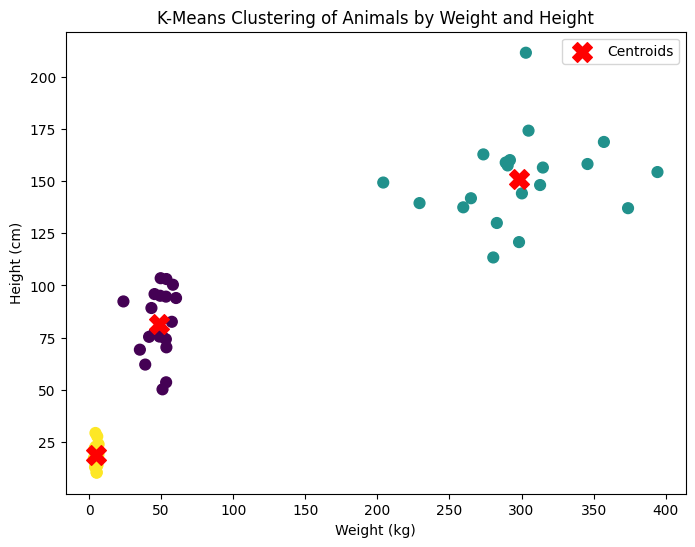

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

np.random.seed(42)
small_animals = np.random.normal(loc=[5,20], scale=[1, 5], size=(20, 2))
medium_animals = np.random.normal(loc=[50,80], scale=[10, 15], size=(20, 2))
large_animals = np.random.normal(loc=[300,150], scale=[50, 25], size=(20, 2))
x_animals = pd.DataFrame(np.vstack([small_animals, medium_animals, large_animals]), columns=['Weight_km', 'Height_cm'])
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x_animals)
x_scaled_df = pd.DataFrame(x_scaled, columns=x_animals.columns)
print("Scaled Animal Data (First 5 Rows): \n", x_scaled_df.head())

k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(x_scaled_df)
clusters = k_means.labels_
x_animals['Cluster'] = clusters
print("Animals with clusters (first 5 rows): \n", x_animals.head())
plt.figure(figsize=(8,6))
plt.scatter(
    x_animals['Weight_km'], 
    x_animals['Height_cm'], 
    c=x_animals['Cluster'], 
    cmap='viridis', 
    s=60
)
centroids = scalar.inverse_transform(k_means.cluster_centers_)
plt.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    c='red', 
    s=200, 
    marker='X', 
    label='Centroids'
)
plt.title("K-Means Clustering of Animals by Weight and Height")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.legend()
plt.show()